<a href="https://colab.research.google.com/github/IvanKatorgin/Satistics-in-Python/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B2_Python_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Домашнее задание Проверка гипотез. Каторгин И.П.

In [ ]:
import numpy as np, scipy.stats as st, pandas as pd, math, matplotlib.pyplot as plt

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [ ]:
def check_normality(data):
  stat, p = st.shapiro(data) # тест Шапиро-Уилк

  alpha = 0.05

  if p < alpha: # условие статистической значимости
    print('Statistics=%.5f, p-value=%.5f' % (stat, p))
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
  else:
    print('Statistics=%.5f, p-value=%.5f' % (stat, p))
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

  return

check_normality

<function __main__.check_normality(data)>

In [ ]:
def check_normality_(data):
  stat, p = st.normaltest(data) # Критерий Пирсона

  alpha = 0.05

  if p < alpha: # условие статистической значимости
    print('Statistics=%.5f, p-value=%.5f' % (stat, p))
    print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
  else:
    print('Statistics=%.5f, p-value=%.5f' % (stat, p))
    print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

  return

check_normality_

<function __main__.check_normality_(data)>

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

Используем t-тест Уэлча

Сначала проверяем отклонение. Перед фактическим проведением t-теста Уэлча нам нужно выяснить, имеют ли данные группы данных одинаковую дисперсию. Если отношение больших групп данных к небольшой группе данных больше 4: 1, то мы можем считать, что данные группы данных имеют неодинаковую дисперсию.

In [ ]:
print(np.var(mens), np.var(womens))

100.09141335994141 99.86609661356039


Можем считать, что данные группы имеют одинаковую дисперсию

In [ ]:
# t-тест Уэлча
stat, p = st.ttest_ind(mens, womens, equal_var = False)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.001:
    print('Не отклоняем нулевую гипотезу, различие между выборками незначительно')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 28.31364, p = 0.00000
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Статистика теста оказывается равной 28,31364, а соответствующее p-значение равно 0,00000. Здесь значение p меньше 0,001, следовательно, на основании t-теста Уэлча мы могли бы отклонить нулевую гипотезу теста и сделать вывод о том, что разница между выборками mens и womens довольно значительна. Далее построим гистограммы и посмотрим графически на распределения

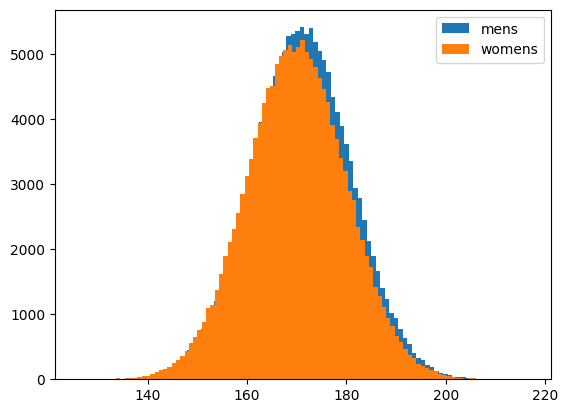

In [ ]:
plt.hist(mens, bins=100, label = 'mens'); # мужчины
plt.hist(womens, bins=100, label = 'womens');  # женщины
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca45419b2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca45419b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca45419b010>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca45419bd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca45419bfd0>],
 'means': []}

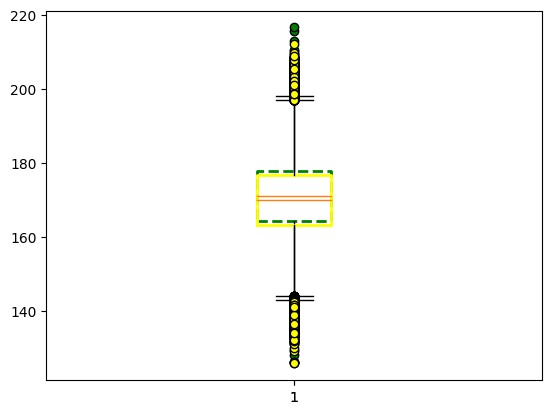

In [ ]:
boxprops = dict(linestyle='--', linewidth=2, color='green')
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
plt.boxplot(mens, boxprops=boxprops, flierprops=flierprops)

boxprops_ = dict(linestyle='-', linewidth=2, color='yellow')
flierprops_ = dict(marker='o', markerfacecolor='yellow', markersize=6, linestyle='none')
plt.boxplot(womens, boxprops=boxprops_, flierprops=flierprops_)

In [ ]:
mens_womens_df = pd.DataFrame({"mens":mens,
                         "womens":womens,
                         "change":mens-womens})
mens_womens_df.describe()

,mens,womens,change
count,150000.000000,150000.000000,150000.000000
mean,171.018346,169.984585,1.033761
std,10.004603,9.993336,14.135610
min,126.343961,125.861140,-62.034758
25%,164.264300,163.250246,-8.496910
50%,171.028935,169.973314,1.022373
75%,177.773002,176.720134,10.560462
max,216.621147,212.193663,62.592418


Выводы:

Результат может быть полезным, например для производства и пошива одежды унисекс, которую могут носить оба пола - мужчины и женщины. Результаты показывают, что выборки все-таки отличаются

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

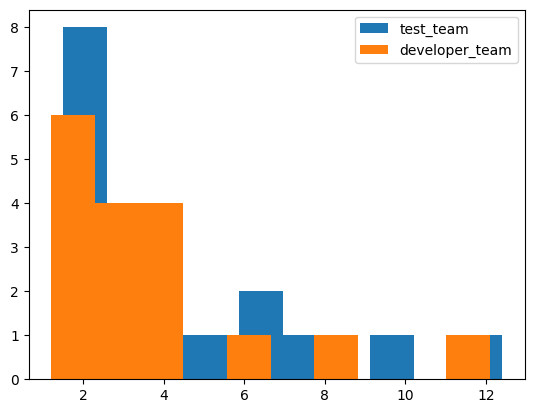

In [ ]:
# стоим гистограмму, чтобы увидеть распределение визуально

plt.hist(test_team, bins=10, label = 'test_team'); # test_team
plt.hist(developer_team, bins=10, label = 'developer_team');  # developer_team
plt.legend()

In [ ]:
# проверяем на нормальность с помошью функции из первого задания (тест Шапиро-Уилк)

check_normality(test_team)

check_normality(developer_team)

Statistics=0.82538, p-value=0.00462
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Statistics=0.75274, p-value=0.00049
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [ ]:
# проверяем на нормальность с помошью функции из первого задания (# Критерий Пирсона)

check_normality_(test_team)

check_normality_(developer_team)

Statistics=8.16613, p-value=0.01686
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Statistics=17.06812, p-value=0.00020
Отклоняем нулевую гипотезу >> Данные распределены не нормально


Поверка на нормальность показала, что данные распределены не нормально, что также подтверждено визуально (гистограммой).

Поскольку данные распределены не нормально, то для проверки гипотезы можно использовать тест Манна-Уитни

In [ ]:
 # Тест Манна-Уитни

stat, p = st.mannwhitneyu (test_team, developer_team, alternative='two-sided')

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в переутомлении между командами нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 151.50000, p = 0.82265
Не отклоняем нулевую гипотезу, разницы в переутомлении между командами нет


Преобразуем данные и после этого можно применять праметрические тесты (Т-тест Стьюдента)

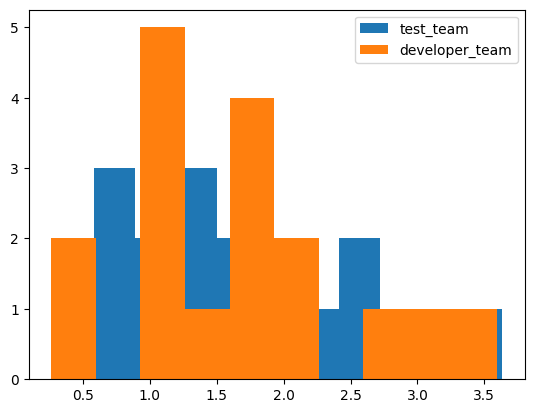

In [ ]:
norm = sorted(np.log2(test_team)) # test_team
norm_ = sorted(np.log2(developer_team)) # developer_team

plt.hist(norm, bins=10, label = 'test_team'); # test_team
plt.hist(norm_, bins=10, label = 'developer_team');  # developer_team
plt.legend()

In [ ]:
# Т-тест Стьюдента

stat, p = st.ttest_ind(norm, norm_)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в переутомлении между командами нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 0.45124, p = 0.65486
Не отклоняем нулевую гипотезу, разницы в переутомлении между командами нет


Выводы:

Исходя из имеющихся данных и полученных на их основании результатов статистических тестов, у нас нет оснований полагать, что есть разница между переутомлением двух команд. Статистическая разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования не выявлена

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

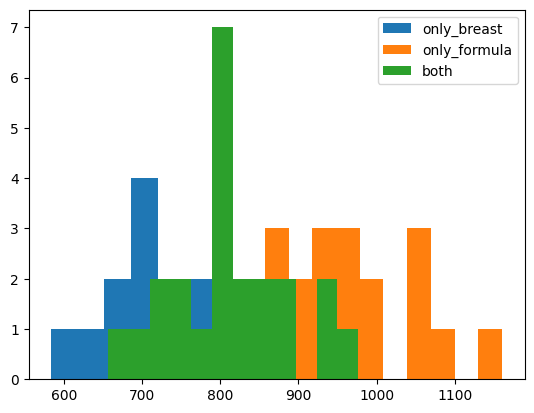

In [ ]:
plt.hist(only_breast, bins=12, label = 'only_breast'); # only_breast
plt.hist(only_formula, bins=12, label = 'only_formula');  # only_formula
plt.hist(both, bins=12, label = 'both');  # both
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca453a2b1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca453a2b760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca453a2af50>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca453a2bca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca453a2bf40>],
 'means': []}

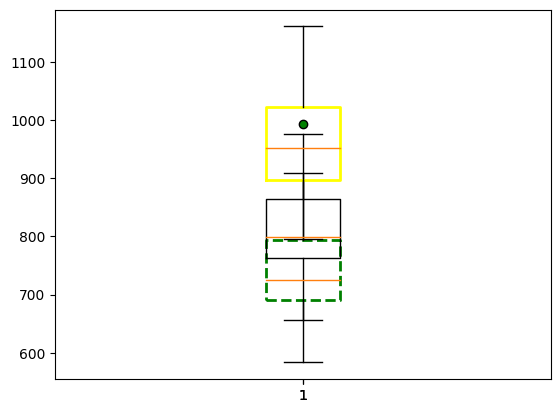

In [ ]:
boxprops = dict(linestyle='--', linewidth=2, color='green')
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
plt.boxplot(only_breast, boxprops=boxprops, flierprops=flierprops)

boxprops_ = dict(linestyle='-', linewidth=2, color='yellow')
flierprops_ = dict(marker='o', markerfacecolor='yellow', markersize=6, linestyle='none')
plt.boxplot(only_formula, boxprops=boxprops_, flierprops=flierprops_)

plt.boxplot(both)

In [ ]:
# проверяем на нормальность с помошью функции из первого задания (тест Шапиро-Уилк)

check_normality(only_breast)

check_normality(only_formula)

check_normality(both)

Statistics=0.95081, p-value=0.46942
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Statistics=0.97608, p-value=0.88790
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Statistics=0.97461, p-value=0.79730
Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [ ]:
# проверяем на нормальность с помошью функции из первого задания (# Критерий Пирсона)

check_normality_(only_breast)

check_normality_(only_formula)

check_normality_(both)

Statistics=3.32192, p-value=0.18996
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Statistics=0.89396, p-value=0.63956
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Statistics=0.47287, p-value=0.78944
Не отклоняем нулевую гипотезу >> Данные распределены нормально


Проверка на нормальность показала, что данные распределены нормально. Для проверки гипотезы используем ANOVA

In [ ]:
from scipy.stats import f_oneway

stat_, p_ = f_oneway(only_breast, only_formula, both)
print(f"Статистика = {stat_:.5f}, p = {p_:.5f}")

if p_ > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в переутомлении между командами нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 26.70125, p = 0.00000
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Выводы: ANOVA показал, что группы отличаются среднемесячным приростом в зависимости от метода вскармливания. Прирост веса действительно зависит от типа вскармливания

Что бы далее определить, между какими конкретными группами существует статистически значимые различия, применим тест Тьюки

In [ ]:
# тест Тьюки
from scipy.stats import tukey_hsd

res = tukey_hsd(only_breast, only_formula, both)
print(res)


Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -209.392     0.000  -281.434  -137.351
 (0 - 2)    -60.129     0.100  -129.149     8.891
 (1 - 0)    209.392     0.000   137.351   281.434
 (1 - 2)    149.264     0.000    82.365   216.162
 (2 - 0)     60.129     0.100    -8.891   129.149
 (2 - 1)   -149.264     0.000  -216.162   -82.365



p-value > 0,05 между группами only_breast и both. Это значит, что
статистически значимой разницы между средними значениями данных групп нет, тогда как между группами only_breast и only_formula, а так же между only_formula и both вероятно имеется статистически значимая разница

In [ ]:
only_breast_df = pd.DataFrame({"only_breast":only_breast})
only_formula_df = pd.DataFrame({"only_formula":only_formula})
both_df = pd.DataFrame({"both":both})
print(only_breast_df.describe())
print(only_formula_df.describe())
print(both_df.describe())

       only_breast
count    17.000000
mean    749.823529
std     102.007062
min     583.500000
25%     690.800000
50%     724.700000
75%     794.100000
max     993.000000
       only_formula
count     19.000000
mean     959.215789
std       89.159004
min      796.300000
25%      897.200000
50%      952.500000
75%     1021.550000
max     1160.500000
             both
count   23.000000
mean   809.952174
std     79.859546
min    656.400000
25%    762.600000
50%    799.400000
75%    864.400000
max    976.400000


p-value > 0,05 между группами only_breast и both. Это значит, что
статистически значимой разницы между средними значениями данных групп нет, тогда как между группами only_breast и only_formula, а так же между only_formula и both вероятно имеется статистически значимая разница. Дальнейший анализ показал, что средний наилучшие показатели у группы детей, которые ходятся на искусственном вскармливании, что может свидетельствовать о том, что искусственное вскармливание более сбаланированно всравнении с естветсвенным молоком матери и содержит больше питательных веществ, необходимых грудному ребенку

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [ ]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


In [ ]:
chi, pval, dof, exp = st.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.01

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

print(pval)
if pval < significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1.")
    print('Склонность к риску зависит от пола!')
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Склонность к риску не зависит от пола.")

p-value = 0.130992, уровень значимости = 0.01
0.13099220858734012
На уровене значимости 0.01, мы не отвергаем нулевые гипотезы. Склонность к риску не зависит от пола.


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

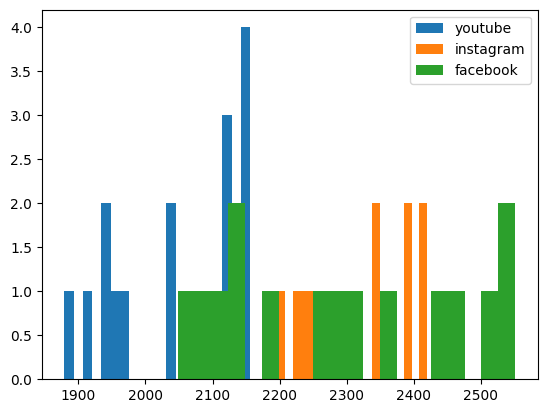

In [ ]:
plt.hist(youtube, bins=20, label = 'youtube'); # only_breast
plt.hist(instagram, bins=20, label = 'instagram');  # only_formula
plt.hist(facebook, bins=20, label = 'facebook');  # both
plt.legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ca453679810>,
 'caps': [<matplotlib.lines.Line2D at 0x7ca453679d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ca453679570>],
 'medians': [<matplotlib.lines.Line2D at 0x7ca45367a290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ca45367a530>],
 'means': []}

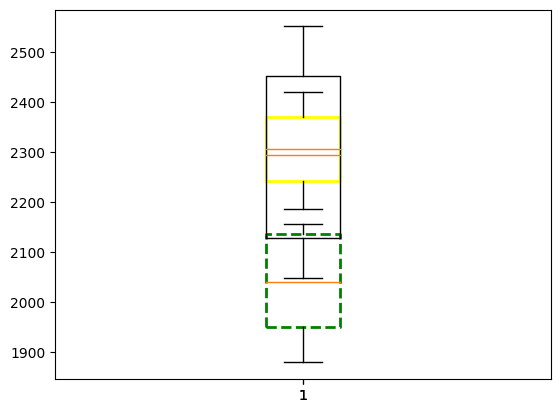

In [ ]:
boxprops = dict(linestyle='--', linewidth=2, color='green')
flierprops = dict(marker='o', markerfacecolor='green', markersize=6, linestyle='none')
plt.boxplot(youtube, boxprops=boxprops, flierprops=flierprops)

boxprops_ = dict(linestyle='-', linewidth=2, color='yellow')
flierprops_ = dict(marker='o', markerfacecolor='yellow', markersize=6, linestyle='none')
plt.boxplot(instagram, boxprops=boxprops_, flierprops=flierprops_)

plt.boxplot(facebook)

In [ ]:
# проверяем на нормальность с помошью функции из первого задания (тест Шапиро-Уилк)

check_normality(youtube)

check_normality(instagram)

check_normality(facebook)

Statistics=0.86503, p-value=0.02854
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Statistics=0.94255, p-value=0.41558
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Statistics=0.91671, p-value=0.17158
Не отклоняем нулевую гипотезу >> Данные распределены нормально


In [ ]:
# проверяем на нормальность с помошью функции из первого задания (# Критерий Пирсона)

check_normality_(youtube)

check_normality_(instagram)

check_normality_(facebook)

Statistics=6.24718, p-value=0.04400
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Statistics=2.97419, p-value=0.22603
Не отклоняем нулевую гипотезу >> Данные распределены нормально
Statistics=4.23928, p-value=0.12007
Не отклоняем нулевую гипотезу >> Данные распределены нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Поскольку не все данные распределены нормально, то для проверки гипотезы используем тест Крускала-Уоллиса

In [ ]:
stat1, p1 = st.kruskal(youtube, instagram, facebook)
print(f"Статистика = {stat1:.5f}, p = {p1:.5f}")

if p1 > 0.05:
    print('Не отклоняем нулевую гипотезу, разницы в переутомлении между командами нет')
else:
    print('Отклоняем нулевую гипотезу, выборки, вероятно, различаются')

Статистика = 22.19354, p = 0.00002
Отклоняем нулевую гипотезу, выборки, вероятно, различаются


Поскольку это p-значение меньше 0,05, мы можем отвергнуть нулевую гипотезу о том, что нет разницы между средним числом привлеченных клиентов на этих трех платформах. У нас есть достаточно доказательств, чтобы заключить, что способ привлечения приводит к статистически значимым различиям.

Что бы далее определить, между какими конкретными группами существует статистически значимые различия, применим тест Данна

In [ ]:
pip install scikit-posthocs

In [ ]:
import scikit_posthocs as sp

In [ ]:
data = [youtube, instagram, facebook]

sp.posthoc_dunn (data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000041,0.000553
2,0.000041,1.000000,1.000000
3,0.000553,1.000000,1.000000


По результатам теста Данна мы можем наблюдать следующее:

Скорректированное значение p для разницы между youtube, instagram составляет 0.000041.

Скорректированное значение p для разницы между youtube и facebook составляет 0.000553.

Скорректированное значение p для разницы между instagram и facebook составляет 1.000000.

Таким образом, instagram и facebook статистически не различаются друг от друга при α = 0,05, тогда как youtube статистически отличается как от instagram, так и от facebook.

In [ ]:
chanels_df = pd.DataFrame({"youtube":youtube,
                         "instagram":instagram,
                         "facebook":facebook})
chanels_df.describe()

,youtube,instagram,facebook
count,15.000000,15.000000,15.000000
mean,2043.533333,2307.533333,2295.400000
std,100.948266,77.815594,175.281732
min,1879.000000,2185.000000,2048.000000
25%,1949.500000,2242.500000,2128.500000
50%,2040.000000,2305.000000,2293.000000
75%,2136.500000,2370.500000,2451.500000
max,2156.000000,2420.000000,2551.000000


Тест Крускала-Уоллиса показал, что есть статистически значимая разница между средним числом привлеченных клиентов на трех платформах (youtube, instagram, facebook).

Тест Данна показал, что instagram и facebook статистически не различаются друг от друга при α = 0,05, тогда как youtube статистически отличается как от instagram, так и от facebook

Анализ показывает, что youtube дает довольно меньший охват привлечения клиентов по сравнению с instagram и facebook и в дальнейшем затраты на него могут быть уменьшены, тогда как на instagram и facebook увеличены